In [1]:
!pip install matplotlib
!pip install keras
!pip install numpy
!pip install tensorflow
!pip install scipy


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


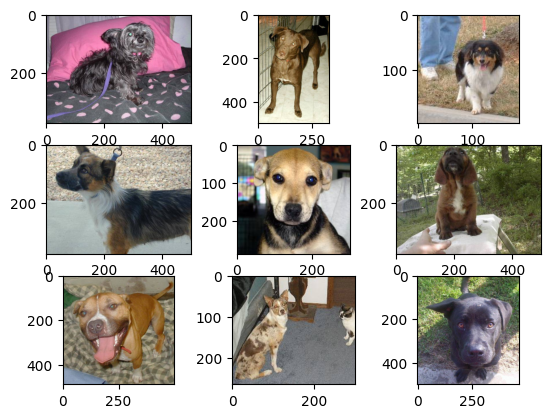

In [9]:
from matplotlib import pyplot
from matplotlib.image import imread

#https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

# define location of dataset
folder = '../train/dogs-vs-cats/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()


In [6]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = '../train/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/', 'evaluate/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
number_file_limit = 10
# copy training dataset images into subdirectories
src_directory = '../train/dogs-vs-cats/train/'
for file in listdir(src_directory):

	src = src_directory + '/' + file
	dst_dir = 'train/'
	current_number_file_limit = number_file_limit
	r = random()
	if r < val_ratio:
		if r <= float(val_ratio/2):
			dst_dir = 'test/'
		if r > float(val_ratio/2):
			dst_dir = 'evaluate/'
		current_number_file_limit = int(number_file_limit*val_ratio)
	if file.startswith('cat'):
		directory = dataset_home + dst_dir + 'cats/'
		dst = directory + file
		if len(listdir(directory)) > current_number_file_limit:
			continue
		copyfile(src, dst)
	elif file.startswith('dog'):
		directory = dataset_home + dst_dir + 'dogs/'
		dst = directory + file
		if len(listdir(directory)) > current_number_file_limit:
			continue
		copyfile(src, dst)


Found 22 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


C:\github\MLOps-is-above-all-a-human-adventure\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\A115VC\AppData\Local\Temp\ipykernel_27996\1223612304.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 8.9259 - accuracy: 0.3182 - val_loss: 7.6525e-08 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.1511 - accuracy: 0.9545 - val_loss: 5.3743e-12 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 3.4163e-06 - accuracy: 1.0000 - val_loss: 1.2188e-14 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 4.5646e-09 - accuracy: 1.0000 - val_loss: 2.7689e-16 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.9888e-11 - accuracy: 1.0000 - val_loss: 7.0095e-18 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 9.5949e-14 - accuracy: 1.0000 - val_loss: 2.5501e-19 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 6.6302e-16 - accuracy: 1.0000 - val_loss: 1.2378e-20 - val_accuracy: 

C:\Users\A115VC\AppData\Local\Temp\ipykernel_27996\1223612304.py:70: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(evaluate_it, steps=len(evaluate_it), verbose=0)


> 83.333


ValueError: Format 'py' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

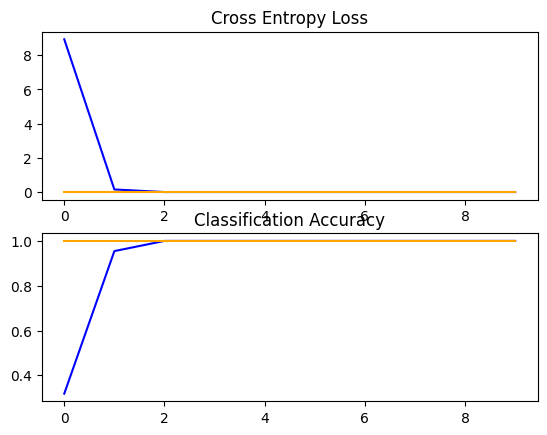

In [7]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import Image

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	plot_filename = "../train/" + filename + '_plot.png'
	pyplot.savefig(plot_filename)
	pyplot.close()
   # Image(filename=plot_filename)



# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('../train/dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('../train/dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	evaluate_it = datagen.flow_from_directory('../train/dataset_dogs_vs_cats/evaluate/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	_, acc = model.evaluate_generator(evaluate_it, steps=len(evaluate_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.save('../train/final_model.h5')

# entry point, run the test harness
run_test_harness()


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

sample_image = 'sample_image.jpg'
Image(filename=sample_image)
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.jpg')
	# load model
	model = load_model('../train/final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])


# entry point, run the example
run_example()

OSError: No file or directory found at ../train/final_model.h5

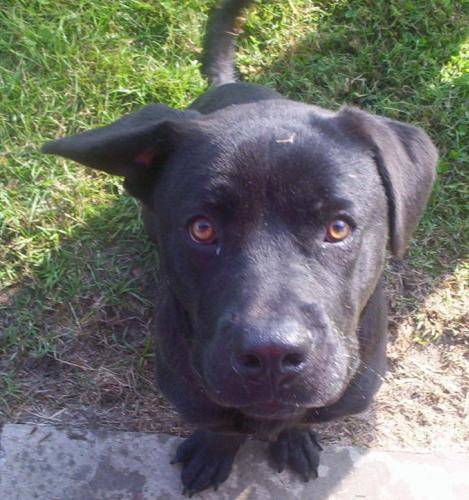

toto


In [2]:
toto="toto"